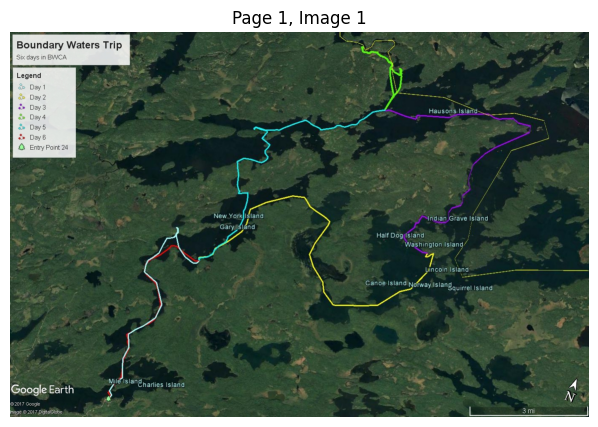

Processed: page1_img1.png
Extracted text:
Boundary Waters Trip

Google Earth

©2017 Google
Image © 2017,DidtalGlobe.

es
—~
Hausons Islami

“4
me

New YorkJigiand
Indian Grave Island

Gary,
Half Dogisiand
Washington Island/

uincoin Island

Canoe 'lsland'Nefway sland, vice) island

Mile Islan@narlies Island

Extracted text saved to: page1_img1_text.txt
--------------------


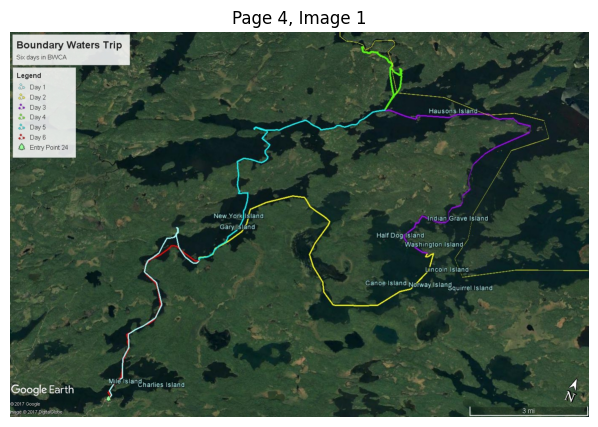

Processed: page4_img1.png
Extracted text:
Boundary Waters Trip

Google Earth

©2017 Google
Image © 2017,DidtalGlobe.

es
—~
Hausons Islami

“4
me

New YorkJigiand
Indian Grave Island

Gary,
Half Dogisiand
Washington Island/

uincoin Island

Canoe 'lsland'Nefway sland, vice) island

Mile Islan@narlies Island

Extracted text saved to: page4_img1_text.txt
--------------------


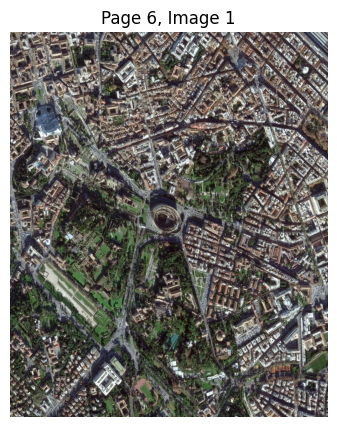

Processed: page6_img1.png
Extracted text:

Extracted text saved to: page6_img1_text.txt
--------------------


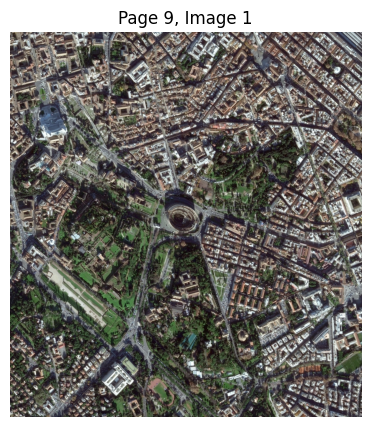

Processed: page9_img1.png
Extracted text:

Extracted text saved to: page9_img1_text.txt
--------------------


In [1]:
import fitz  # PyMuPDF #fitz (PyMuPDF): Used to interact with PDF files.
import io  #io: Handles byte streams (in this case, for image data).
from PIL import Image  #PIL (Python Imaging Library): Used for image manipulation (e.g., saving images).
import pytesseract #pytesseract: Python wrapper for Tesseract OCR, used to extract text from images.
import os  #os: For file and directory operations (e.g., creating directories, joining paths).
import matplotlib.pyplot as plt # matplotlib.pyplot: Used for displaying images.


def extract_images_and_text_from_pdf(pdf_path, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the PDF
    pdf_document = fitz.open(pdf_path)

    # Iterate through each page
    for page_num in range(len(pdf_document)):
        page = pdf_document[page_num]
        
        # Get image list
        image_list = page.get_images(full=True)
        
        # Iterate through the images
        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = pdf_document.extract_image(xref)
            image_bytes = base_image["image"]
            
            # Open the image
            image = Image.open(io.BytesIO(image_bytes))
            
            # Save the image
            image_filename = f"page{page_num+1}_img{img_index+1}.png".
            image_path = os.path.join(output_dir, image_filename)
            image.save(image_path)
            
            # Extract text from the image
            text = pytesseract.image_to_string(image)
            
            # Save the extracted text
            text_filename = f"page{page_num+1}_img{img_index+1}_text.txt"# file name to store the extracted data
            text_path = os.path.join(output_dir, text_filename)
            with open(text_path, 'w', encoding='utf-8') as text_file:
                text_file.write(text)
            
            # Display the image and text
            plt.figure(figsize=(10, 5))
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"Page {page_num+1}, Image {img_index+1}")
            plt.show()
            
            print(f"Processed: {image_filename}")
            print(f"Extracted text:")
            print(text)
            print(f"Extracted text saved to: {text_filename}")
            print("--------------------")
            '''plt.figure(figsize=(10, 5)): Creates a new figure for displaying the image.
plt.imshow(image): Displays the image.
plt.axis('off'): Hides the axis for a cleaner view.
plt.title(...): Sets the title of the figure.
plt.show(): Displays the figure.
print(...): Prints information about the processed image and extracted text to the console.'''

    pdf_document.close()

# Usage
pdf_path = "sample-pdf-with-images.pdf"
output_directory = "output_folder"
extract_images_and_text_from_pdf(pdf_path, output_directory)